# **Random Forests**


---

## Functions
* `install.packages("randomForest")`
* `library(randomForest)`

* `summary()`
* `predict()`

<br>

---

## Boston Housing Dataset

For this lecture, we will use the Boston Housing Dataset, very popular for understanding regression and prediction in the context of statistics and machine learning.

#### Load dataset

Load the data set at the following [link](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/HousingData.csv)


In [ ]:
# load boston housing dataset
housing <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/HousingData.csv",
                    header = TRUE)

# remove NAs just for now
housing <- na.omit(housing)

head(housing)

# dimension of data
dim(housing)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


[1] 394  14

#### Data description

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

  * `crim` - per capita crime rate by town.

  * `zn` - proportion of residential land zoned for lots over 25,000 sq.ft.

  * `indus` - proportion of non-retail business acres per town.

  * `chas` - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

  * `nox` - nitrogen oxides concentration (parts per 10 million).

  * `rm` - average number of rooms per dwelling.

  * `age` - proportion of owner-occupied units built prior to 1940.

  * `dis` - weighted mean of distances to five Boston employment centres.

  * `rad` - index of accessibility to radial highways.

  * `tax` - full-value property-tax rate per \$10,000.

  * `ptratio` - pupil-teacher ratio by town.

  * `black` - 1000(Bk - 0.63)^2 where Bk is the proportion of black individuals by town.

  * `lstat` - lower status of the population (percent).

  * `medv` - median value of owner-occupied homes in \$1000s.

<br>

#### Create training and validation split

In [ ]:
set.seed(10)

# randomly sample 300 rows from the dataset
samp <- sample(1:nrow(housing), 300)
train <- housing[samp, ]
nrow(train)


# Use the remaining rows as validation
valid <- housing[-samp, ]
nrow(valid)

[1] 300

[1] 94

<br>

#### Create mean squared error function

In [ ]:
# Mean squared error function
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}

<br>

## Random Forest

Classification and regression trees are possible using the `randomForest` library

In [ ]:
# Load rpart library
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



<br>

#### Fit a random forest

[Random Forest Documentation](https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/randomForest)

In [ ]:
# random forest
fit <- randomForest(MEDV ~ ., 
                    data = train,
                    importance = TRUE,

                    # hyperparameters (change to improve predictions)
                    ntree    = 500,  # number of trees to fit
                    mtry     = 10,   # number of variables to sample per tree
                    nodesize = 1,    # minimum size of terminal nodes
                    maxnodes = NULL, # maximum number of terminal nodes a tree can have
                    )

[1] 14.59863

In [ ]:
# calculate MSE on testing dataset
mse(valid$MEDV, predict(fit, newdata = valid))

[1] 14.59863

<br>

Variable Importance

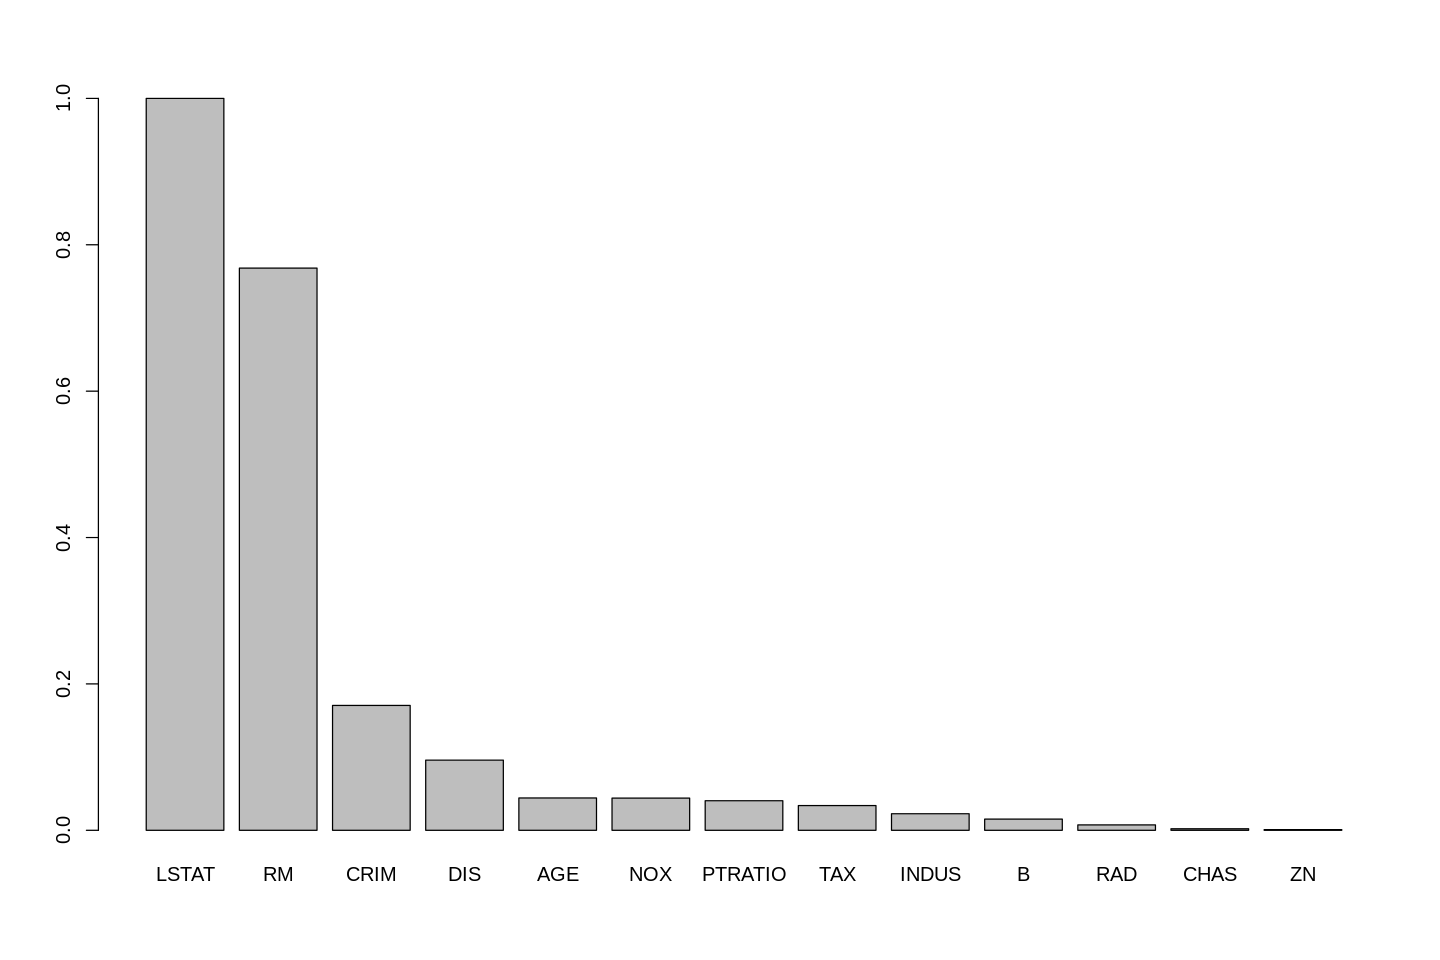

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)

importance <- fit$importance[, 1]
importance <- sort(importance, decreasing = TRUE) / max(importance)
barplot(importance)

Which variables are the most importance for predicting median housing price?

In [ ]:
ntree_seq <- seq(100, 500, 50)
mtry_seq  <- 2:10
nodesize_seq <- 1:10
maxnodes_seq <- c(10)

out <- data.frame()
count <- 0
for (ntree_ind in ntree_seq) {
  for (mtry_ind in mtry_seq) {
    for(nodesize_ind in nodesize_seq) {
      for (maxnodes_ind in maxnodes_seq) {

        count <- count + 1
        print(count)

        # random forest
        fit <- randomForest(MEDV ~ ., 
                            data = train,
                            importance = TRUE,

                            # hyperparameters (change to improve predictions)
                            ntree    = ntree_ind,  
                            mtry     = mtry_ind,   
                            nodesize = nodesize_ind,
                            maxnodes = NULL,
                            )

        mse_ind <- mse(valid$MEDV, predict(fit, newdata = valid))

        out_tmp <- data.frame(ntree_ind, mtry_ind, nodesize_ind, maxnodes_ind, mse_ind)
        out <- rbind(out, out_tmp)


      }
    }
  }
}



In [ ]:
out[which.min(out$mse_ind), ]

,ntree_ind,mtry_ind,nodesize_ind,maxnodes_ind,mse_ind
,<dbl>,<int>,<int>,<dbl>,<dbl>
113,150,4,3,10,11.96537


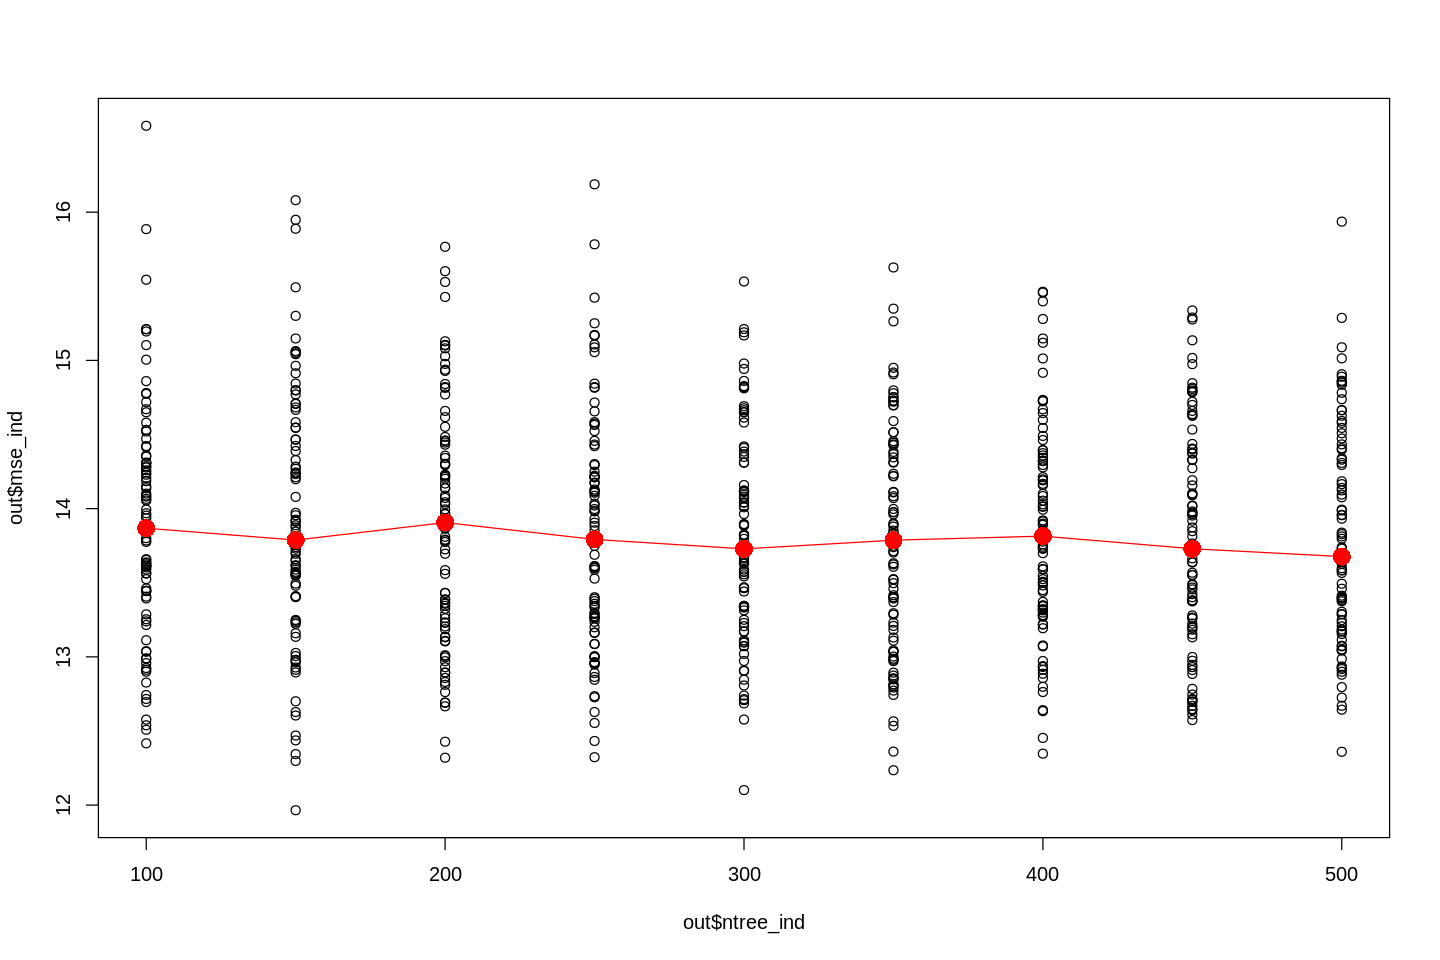

In [ ]:
plot(out$ntree_ind, out$mse_ind)
lines(unique(out$ntree_ind), tapply(out$mse_ind, out$ntree_ind, median), 
      col = "red", pch = 16, type = "o", cex = 2)

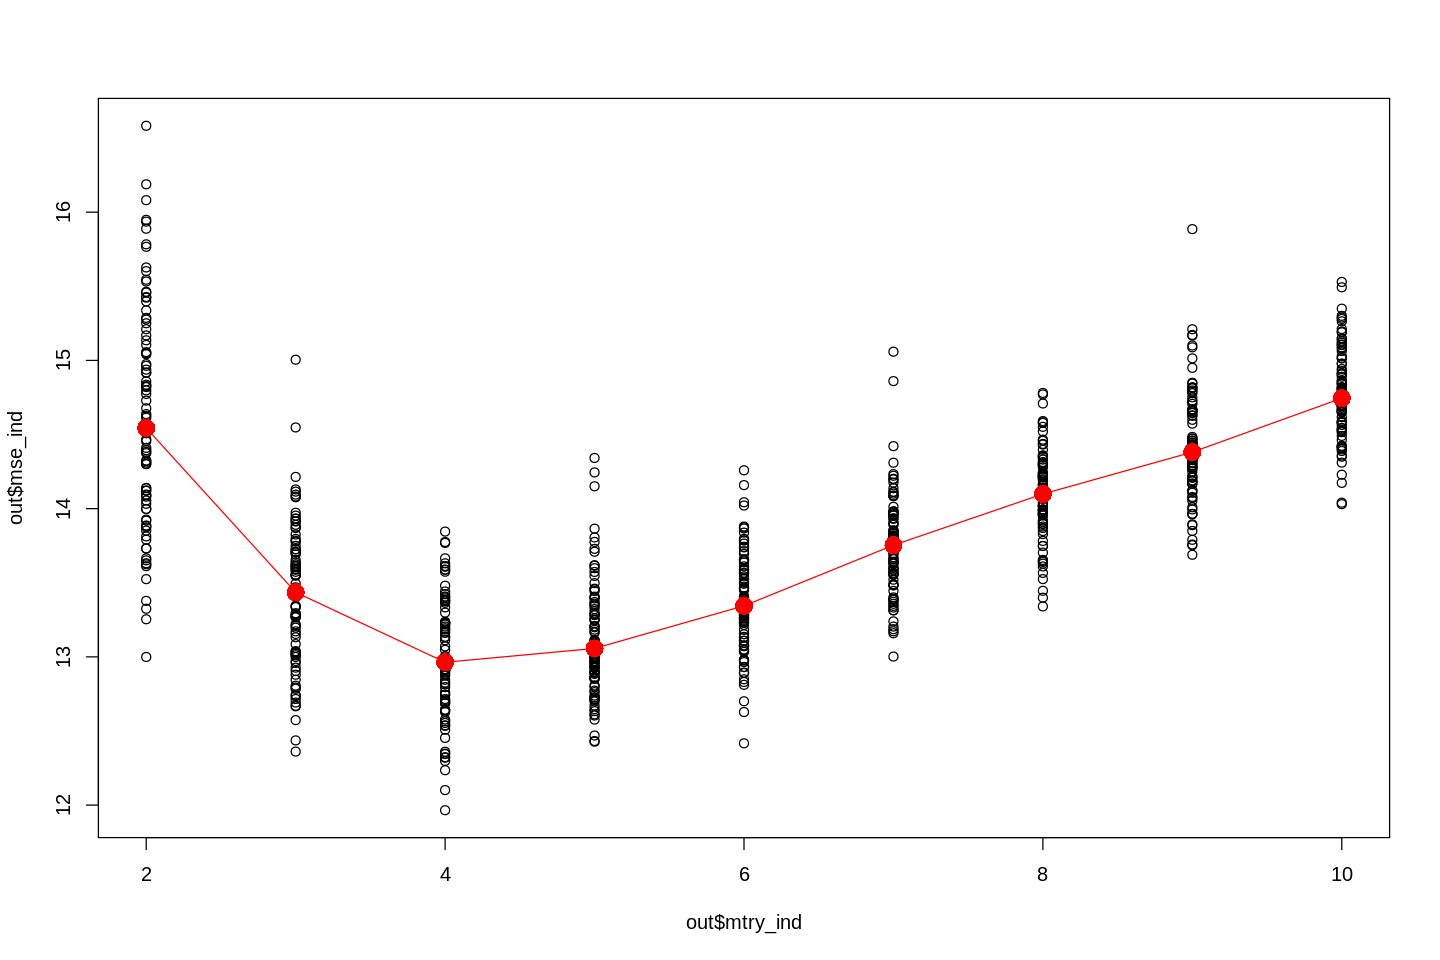

In [ ]:
plot(out$mtry_ind, out$mse_ind)
lines(unique(out$mtry_ind), tapply(out$mse_ind, out$mtry_ind, median), 
      col = "red", pch = 16, type = "o", cex = 2)

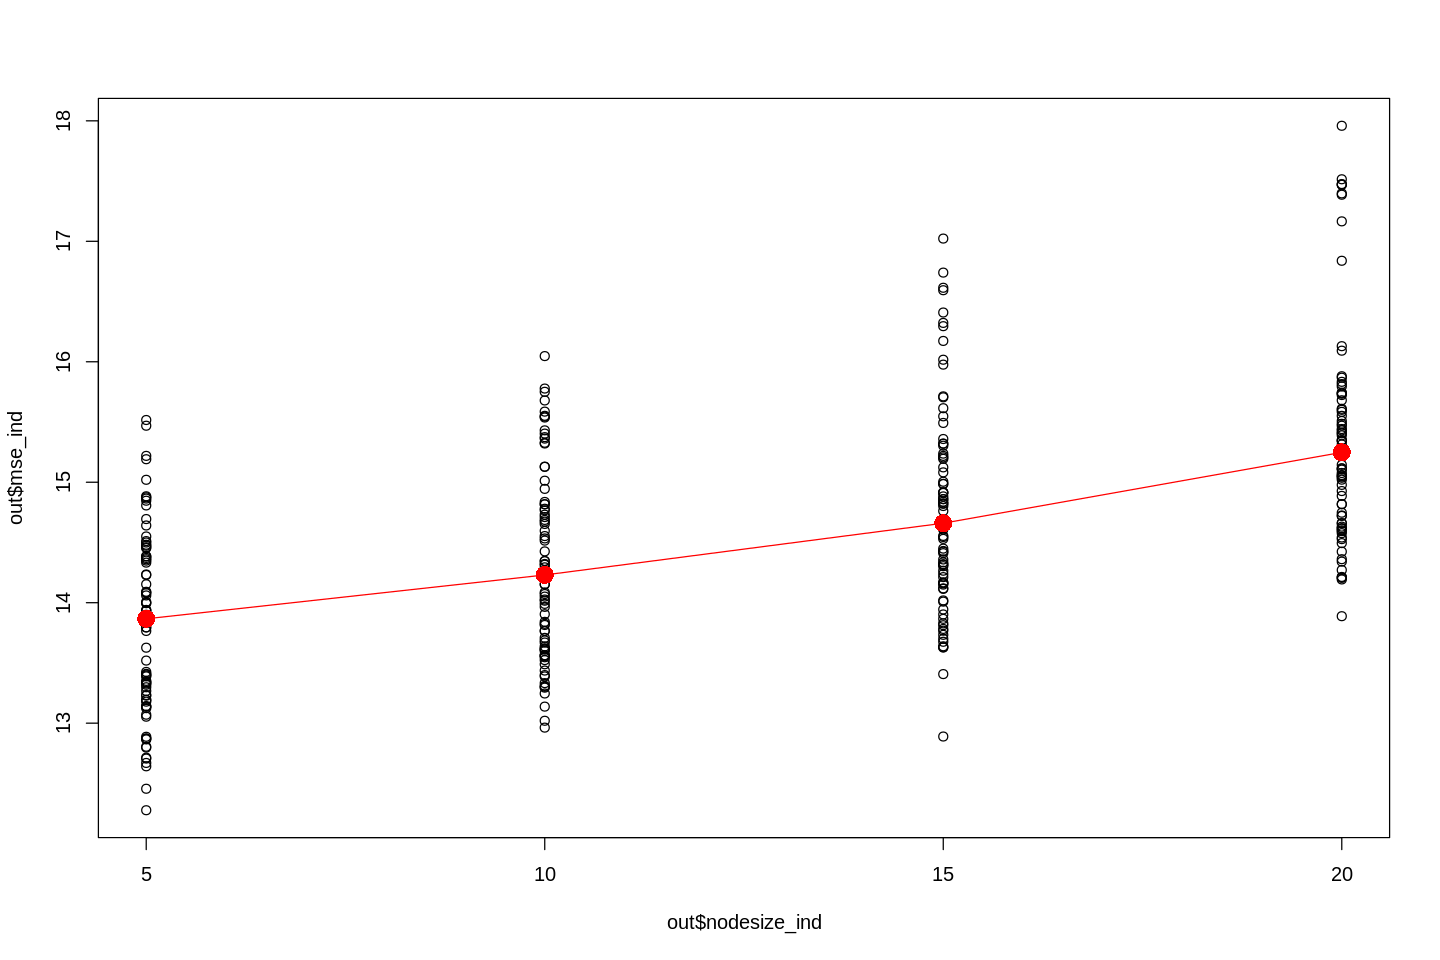

In [ ]:
plot(out$nodesize_ind, out$mse_ind)
lines(unique(out$nodesize_ind), tapply(out$mse_ind, out$nodesize_ind, median), 
      col = "red", pch = 16, type = "o", cex = 2)

In [ ]:
ntree_seq <- seq(100, 500, 100)
mtry_seq  <- 1:10
nodesize_seq <- 1:10
maxnodes_seq <- c(50)

out <- data.frame()
count <- 0
for (ntree_ind in ntree_seq) {
  for (mtry_ind in mtry_seq) {
    for(nodesize_ind in nodesize_seq) {
      for (maxnodes_ind in maxnodes_seq) {

        count <- count + 1
        print(count)

        # random forest
        fit <- randomForest(MEDV ~ ., 
                            data = train,
                            importance = TRUE,

                            # hyperparameters (change to improve predictions)
                            ntree    = ntree_ind,  
                            mtry     = mtry_ind,   
                            nodesize = nodesize_ind,
                            maxnodes = NULL,
                            )

        mse_ind <- mse(valid$MEDV, predict(fit, newdata = valid))

        out_tmp <- data.frame(ntree_ind, mtry_ind, nodesize_ind, maxnodes_ind, mse_ind)
        out <- rbind(out, out_tmp)


      }
    }
  }
}




In [ ]:
out[which.min(out$mse_ind), ]

,ntree_ind,mtry_ind,nodesize_ind,maxnodes_ind,mse_ind
,<dbl>,<int>,<int>,<dbl>,<dbl>
332,400,4,2,50,12.20078


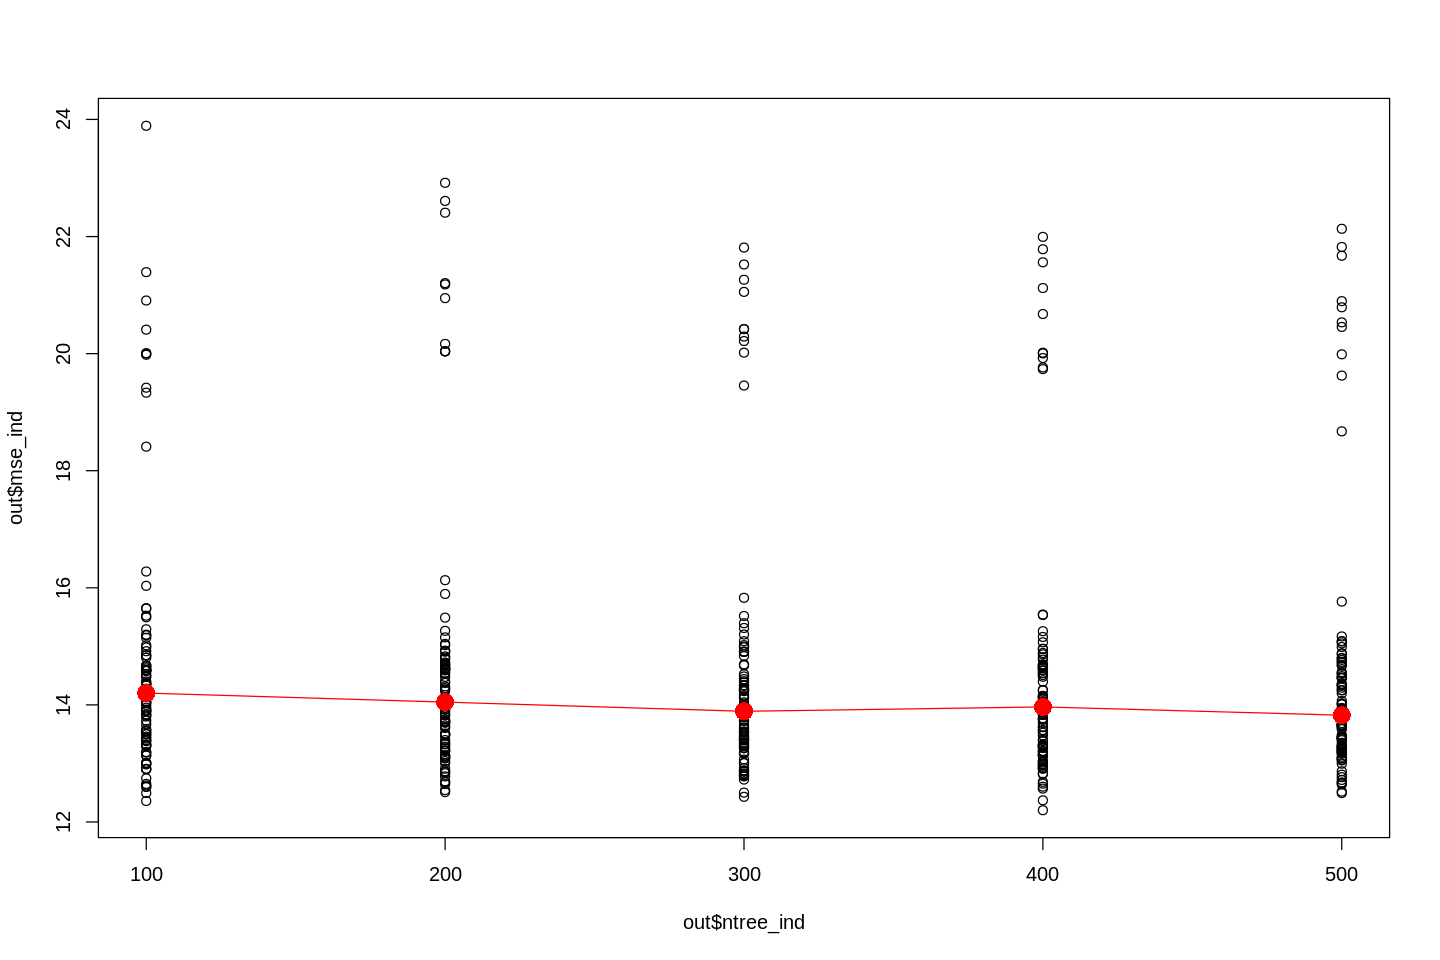

In [ ]:
plot(out$ntree_ind, out$mse_ind)
lines(unique(out$ntree_ind), tapply(out$mse_ind, out$ntree_ind, median), 
      col = "red", pch = 16, type = "o", cex = 2)

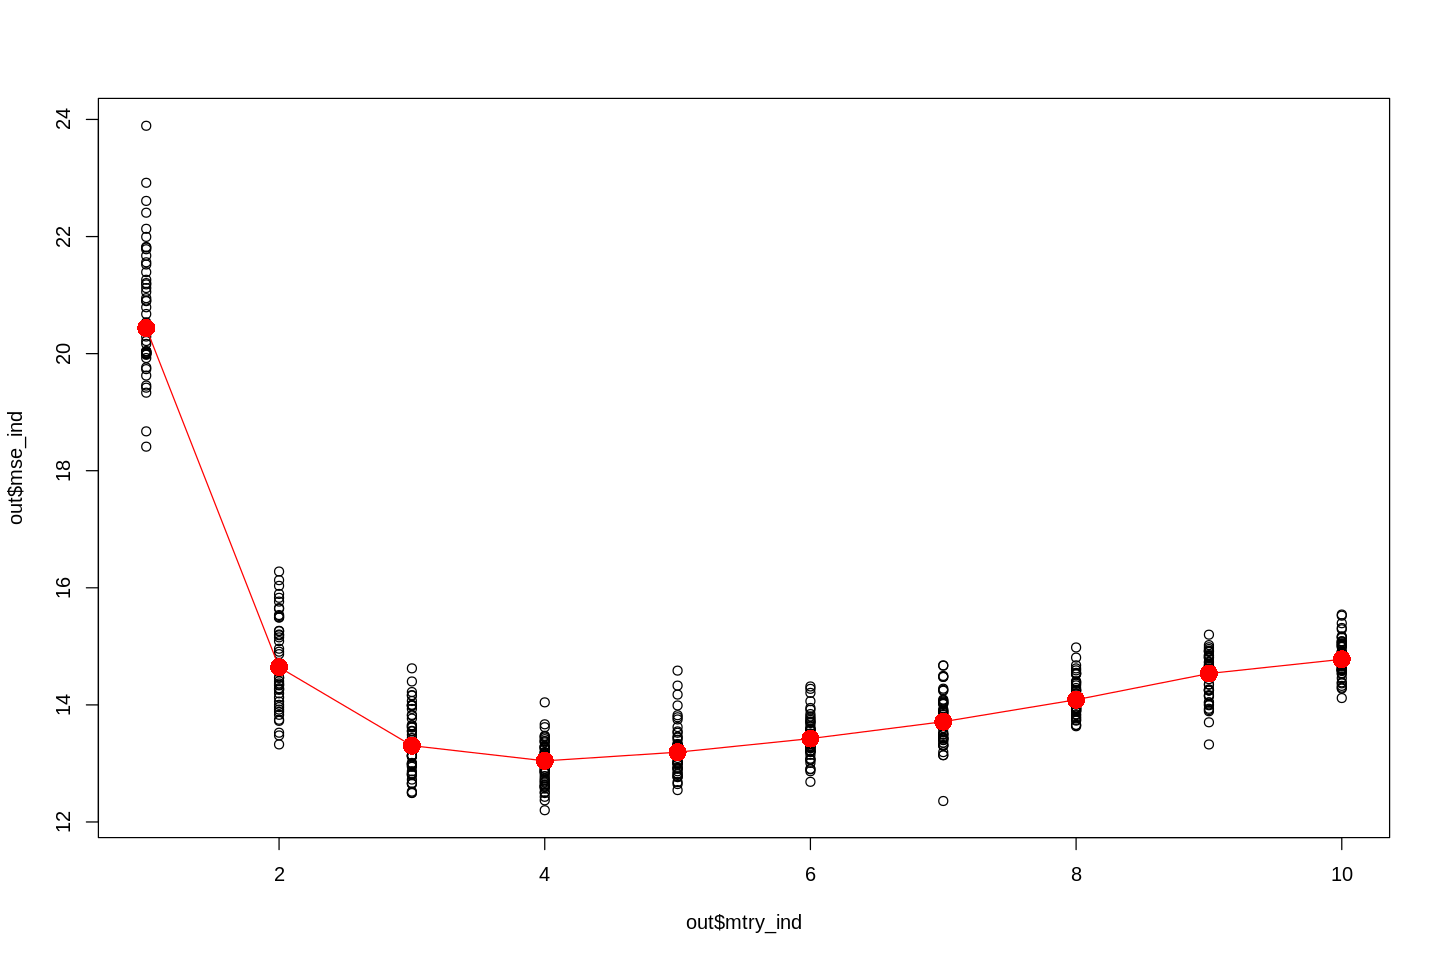

In [ ]:
plot(out$mtry_ind, out$mse_ind)
lines(unique(out$mtry_ind), tapply(out$mse_ind, out$mtry_ind, median), 
      col = "red", pch = 16, type = "o", cex = 2)

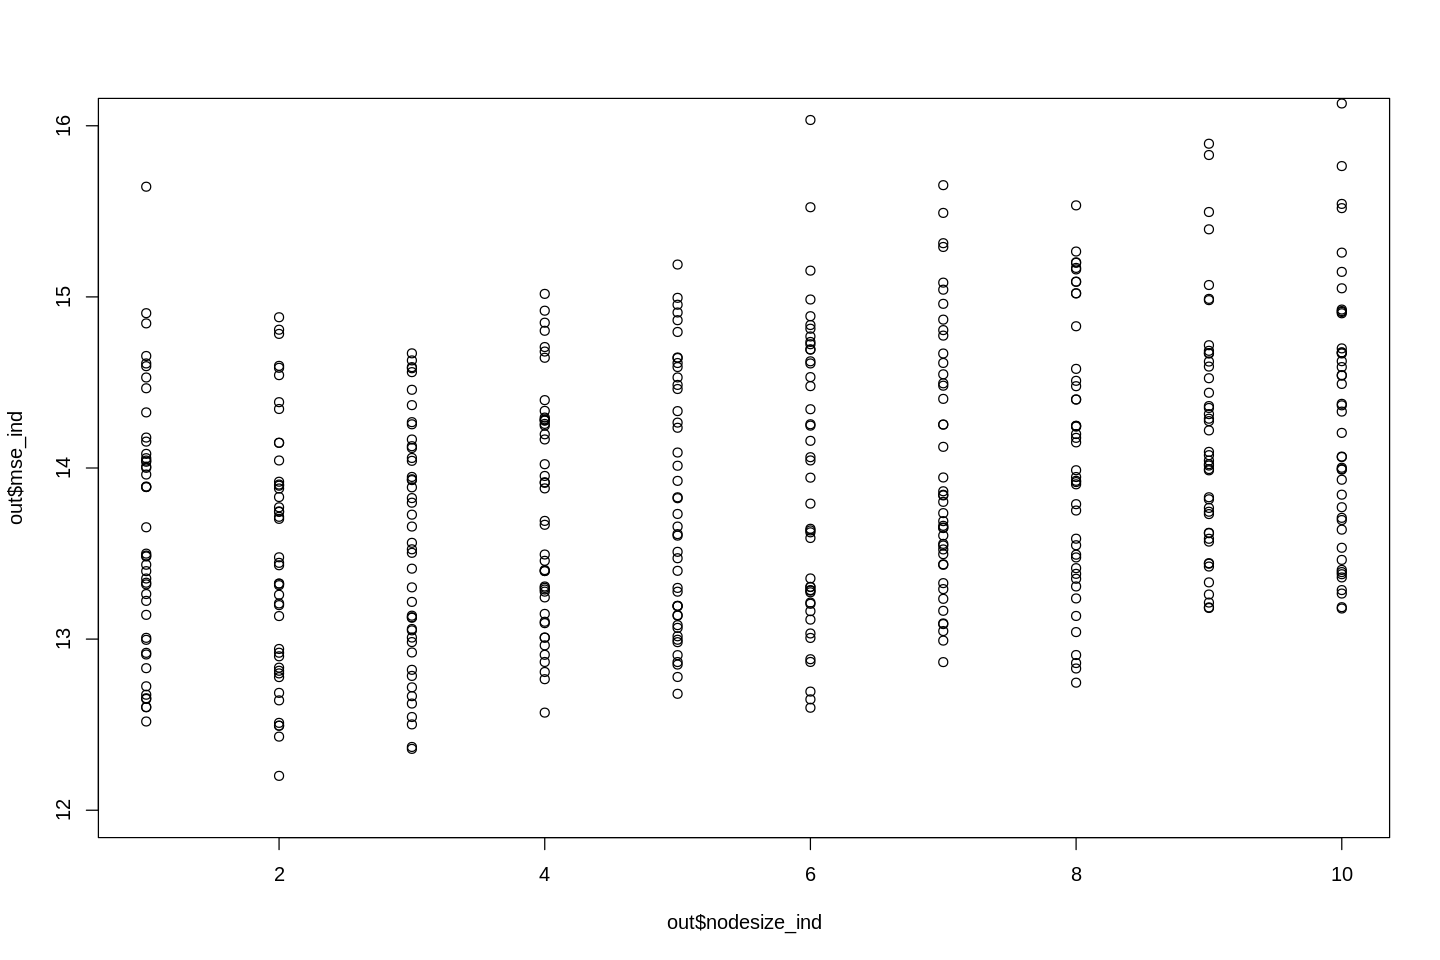

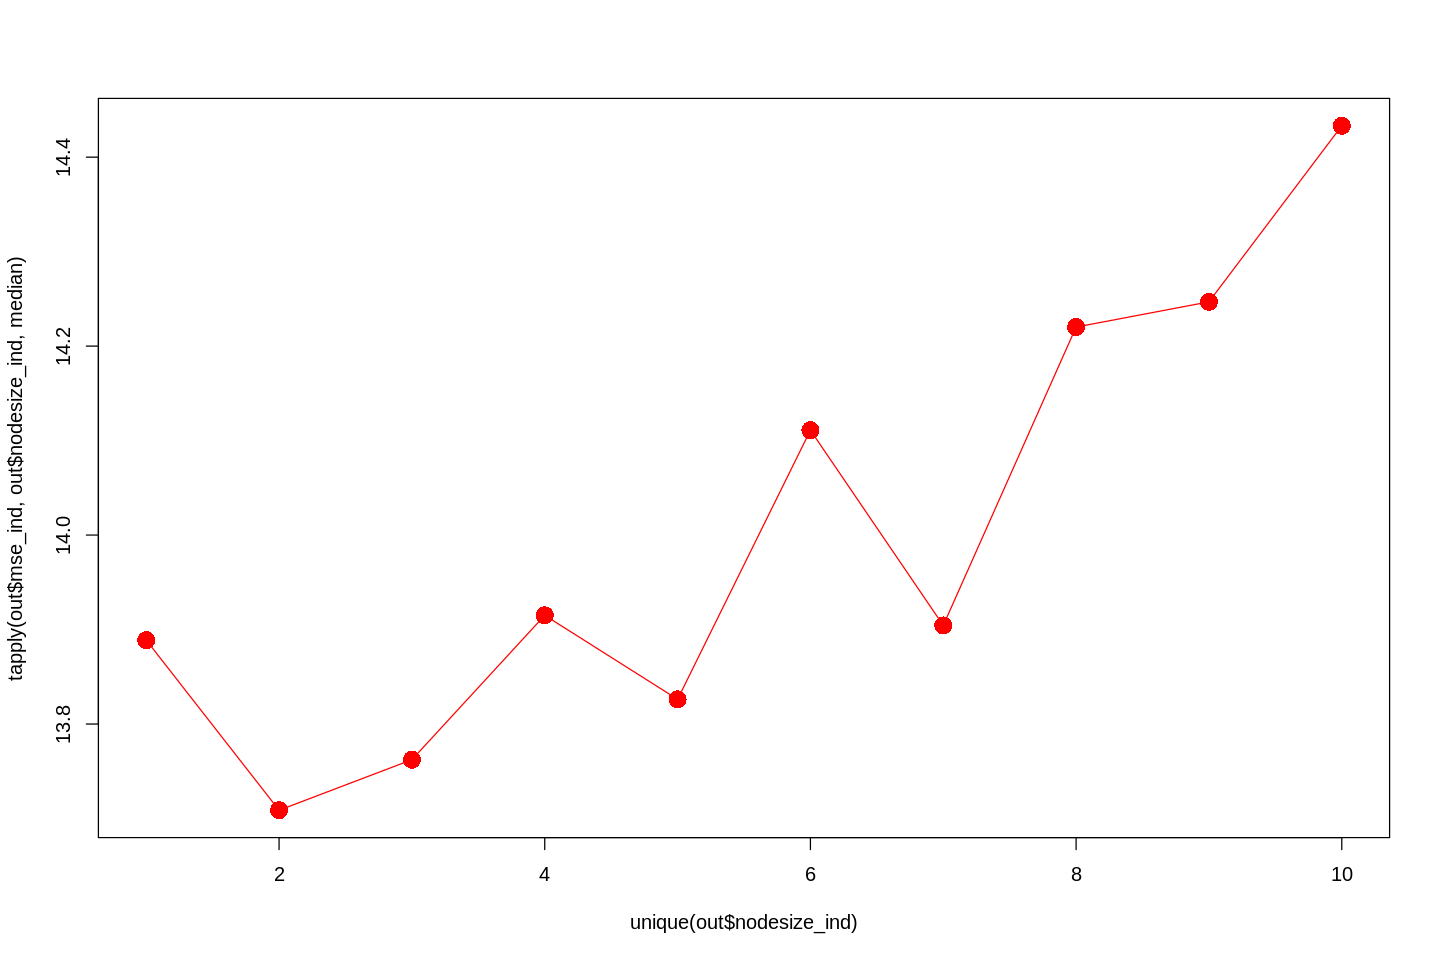

In [ ]:
plot(out$nodesize_ind, out$mse_ind, ylim = c(12, 16))
plot(unique(out$nodesize_ind), tapply(out$mse_ind, out$nodesize_ind, median), 
      col = "red", pch = 16, type = "o", cex = 2)

In [ ]:
mse_all <- c()
for (ii in 1:100) {
  # random forest
  fit <- randomForest(MEDV ~ ., 
                      data = train,
                      importance = TRUE,

                      # hyperparameters (change to improve predictions)
                      ntree    = 500,  
                      mtry     = 4,   
                      nodesize = 2,
                      maxnodes = NULL,
                      )

  mse_all <- c(mse_all, mse(valid$MEDV, predict(fit, newdata = valid)))
}
        

In [ ]:
min(mse_all)

[1] 12.22068

<br>